In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [6]:
path='F:\\Python\\Data Science Intern\\Task_Lab\\VisDrone2019-DET-train\\annotations\\'
df_total=pd.DataFrame()
for file in os.listdir(path):
    df_1=pd.read_csv(path+file,header=None)
    df_1.columns=['bbox_left','bbox_top','bbox_width','bbox_height','score','object_category','truncation','occlusion']
    df_total=pd.concat([df_total, df_1])

def area(x, y):
    return x*y

df_total['area']=df_total.apply(lambda row: area(pd.to_numeric(row['bbox_width']), pd.to_numeric(row['bbox_height'])), axis=1 )
df_total.to_csv('annotations.csv')

In [7]:
df_total =pd.read_csv('annotations.csv').reset_index()

Standardlize

In [8]:
df_total['area'].describe()

count    353516.000000
mean       2490.401164
std        6763.700197
min           0.000000
25%         250.000000
50%         684.000000
75%        2052.000000
max      328640.000000
Name: area, dtype: float64

In [13]:
area_range = [0, 100, 400, 900, 1600, 2500, 6400, 10000, 40000, 328640]
df_total['area_range'] = pd.cut(df_total['area'],bins=area_range)
range_percent = df_total['area_range'].value_counts(normalize = True)*100
print(range_percent)

(100, 400]         26.146422
(400, 900]         20.939258
(900, 1600]        13.129362
(2500, 6400]       12.662052
(0, 100]           10.009250
(1600, 2500]        8.227703
(10000, 40000]      4.509877
(6400, 10000]       3.827016
(40000, 328640]     0.549060
Name: area_range, dtype: float64


# Distribution of sample by the size in a class


In [ ]:
# ignored regions (0), pedestrian (1), people (2), bicycle (3), car (4), van (5),
# truck (6), tricycle (7), awning-tricycle (8), bus (9), motor (10), others (11)

(100, 400]         26.146422
(400, 900]         20.939258
(900, 1600]        13.129362
(2500, 6400]       12.662052
(0, 100]           10.009250
(1600, 2500]        8.227703
(10000, 40000]      4.509877
(6400, 10000]       3.827016
(40000, 328640]     0.549060
Name: area_range, dtype: float64


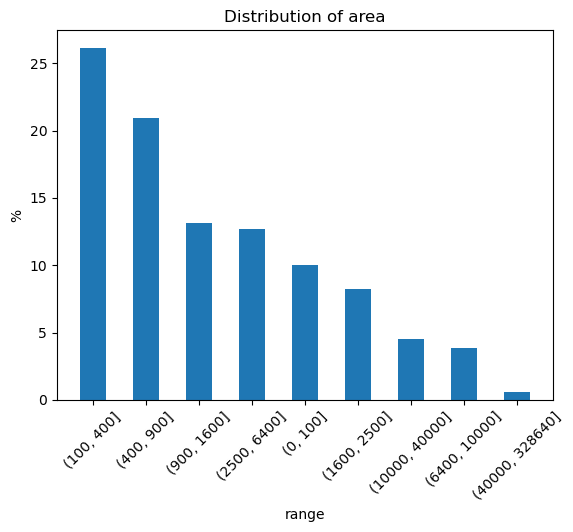

In [22]:

print(range_percent)
plt.bar(range_percent.index.astype(str),range_percent.values,width=0.5)
plt.title("Distribution of area")
plt.xlabel('range')
plt.xticks(rotation = 45)
plt.ylabel('%')
plt.show()

# Distribution of each object area

ignored regions
pedestrian
people
bicycle
car
van
truck
tricycle
awning-tricycle
bus
motor
others


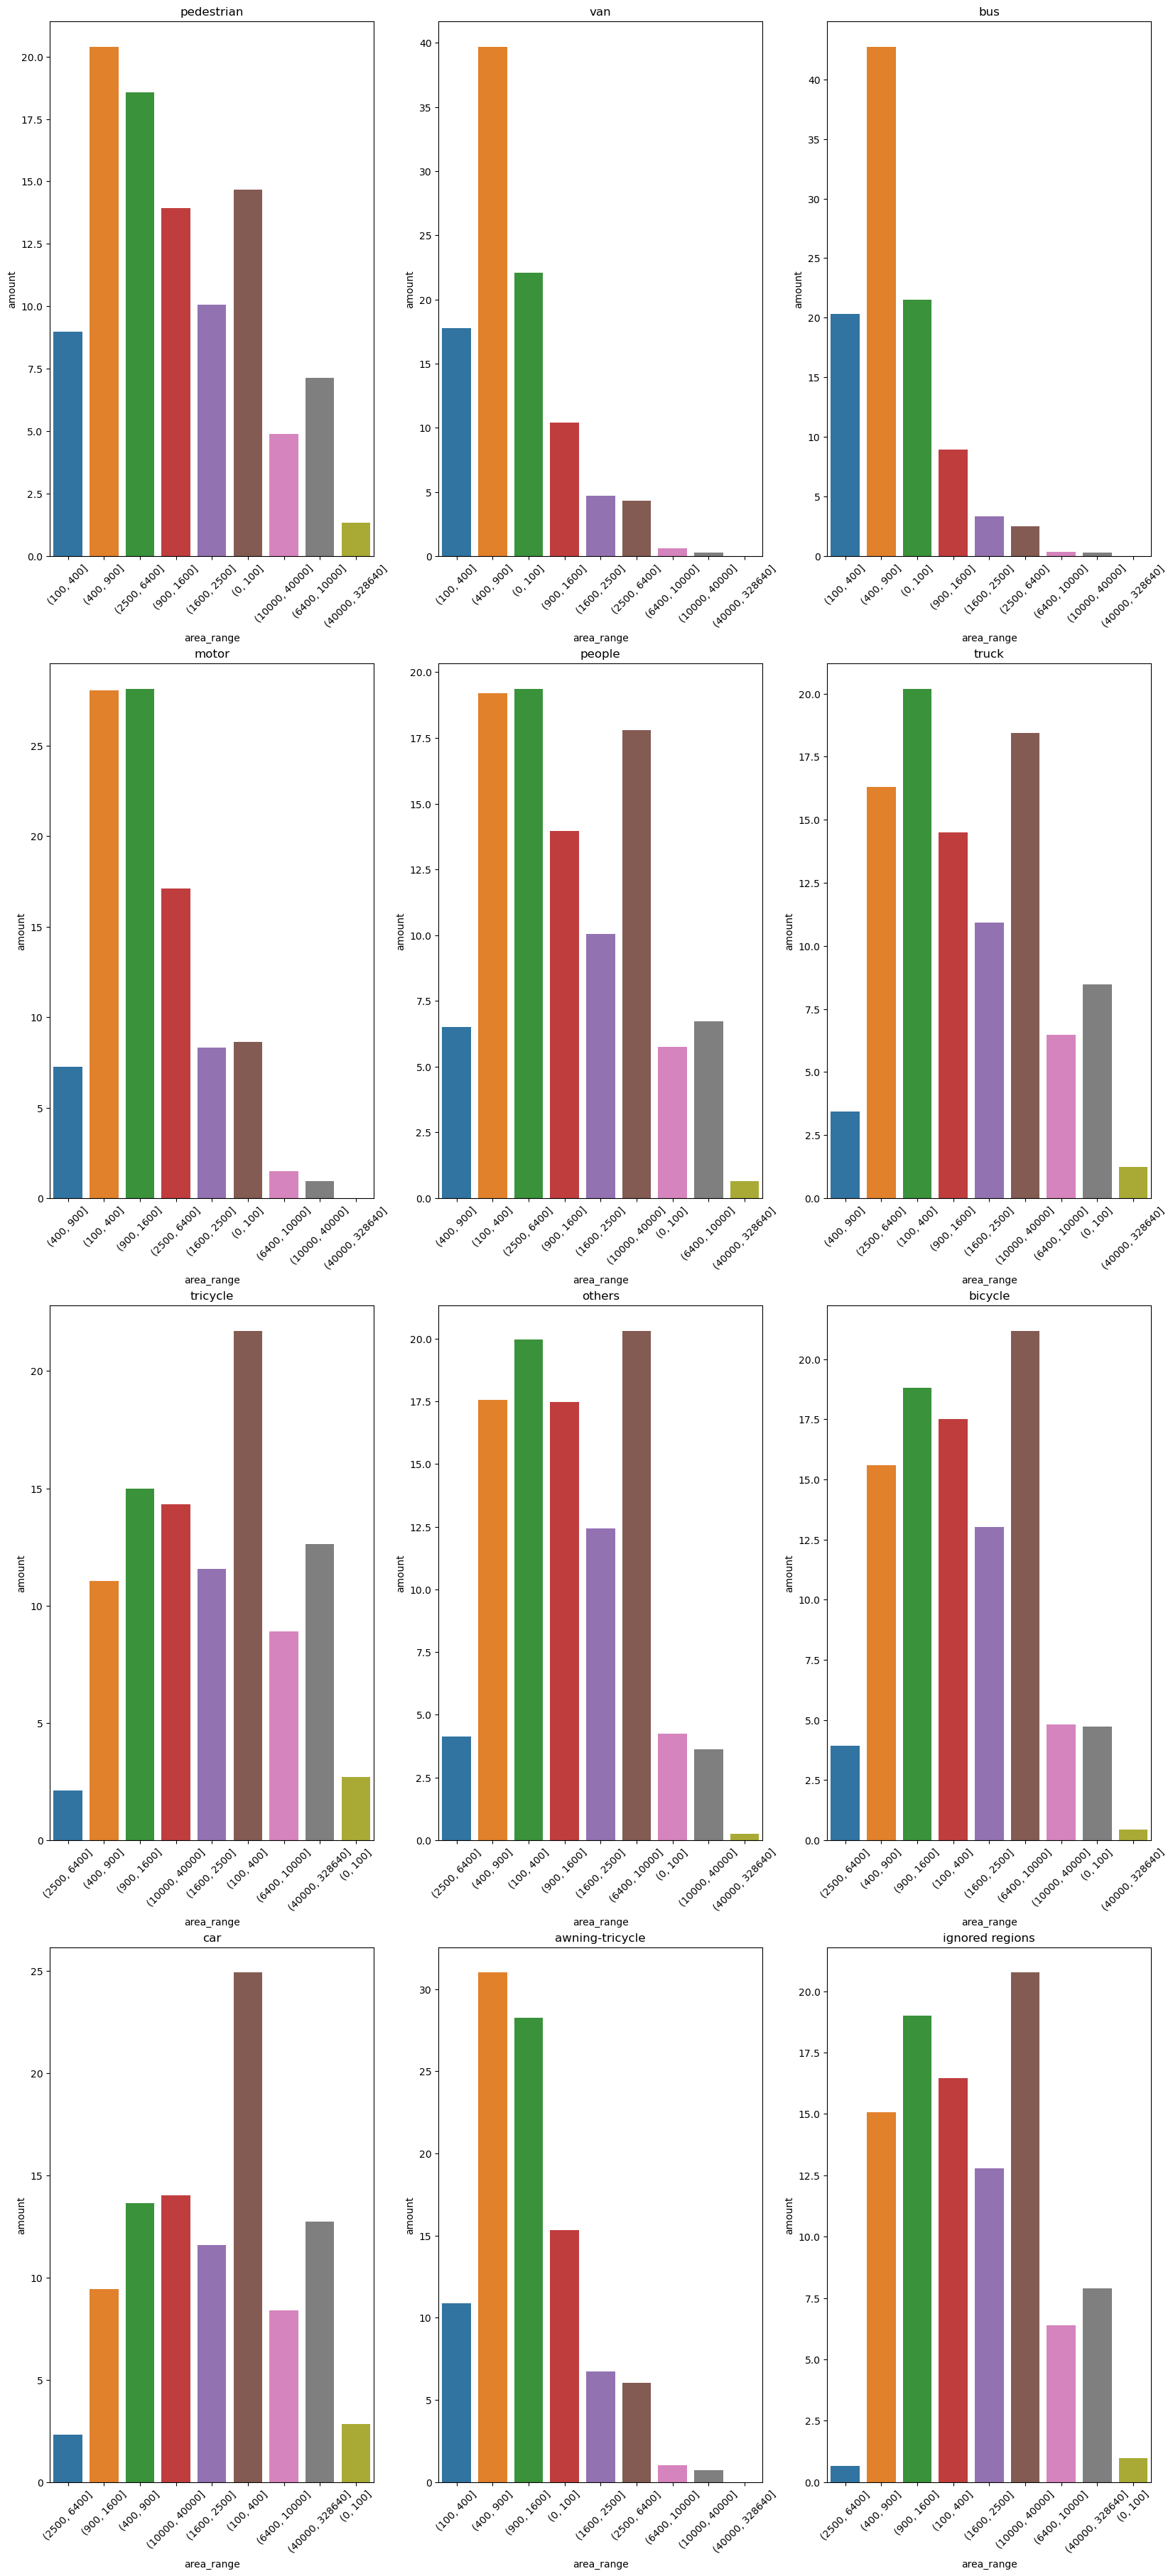

In [43]:
object = {'ignored regions':0, 'pedestrian':1, 'people':2, 'bicycle':3, 'car':4, 'van':5,
'truck':6, 'tricycle':7, 'awning-tricycle':8, 'bus':9, 'motor':10, 'others':11}

fig , axis = plt.subplots(nrows = 4,ncols = 3, figsize=(20,45))
for i in range(0,12):
    df_object = pd.DataFrame(columns=['area_range','amount'])
    df_object['amount'] = df_total['area_range'].loc[df_total['object_category'] == i].value_counts()
    df_object['amount'] = (df_object['amount']/df_object['amount'].sum()) *100
    df_object['area_range'] = df_total['area_range'].loc[df_total['object_category'] == i].value_counts().index


    s = sns.barplot(ax=axis[int(i/3), i%3], x = 'area_range', y="amount", data=df_object)
    print(list(object.keys())[i])
    s.set_xticklabels(df_object['area_range'],rotation=45)
    axis[i%4-1, i%3-1].set_title(list(object.keys())[i])
    
plt.show()


# Distribution of class

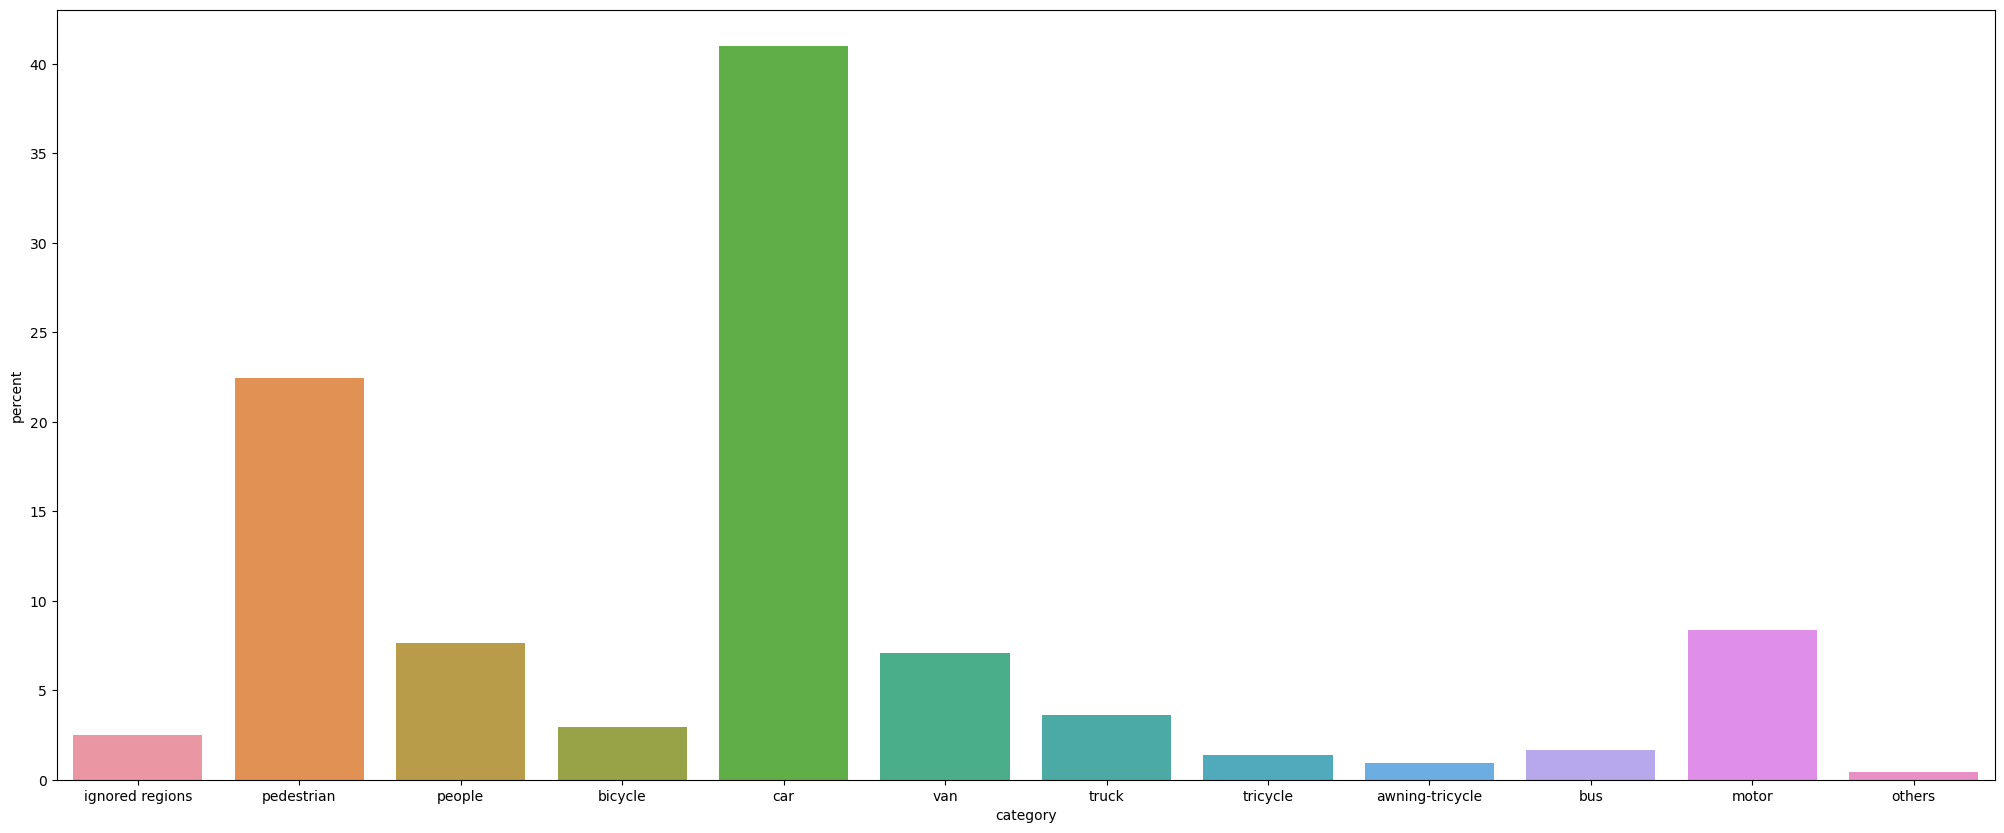

In [61]:
df_object = pd.DataFrame(columns=['category', 'percent'])

df_object['percent'] = df_total['object_category'].value_counts()
df_object['percent'] = (df_object['percent']/df_object['percent'].sum())*100
df_object['percent'] = df_object['percent'].round(2)

df_object['category'] = df_total['object_category'].value_counts().index
df_object.sort_index(inplace=True)
df_object['category'] = object

plt.subplots(figsize = (25,10))
s = sns.barplot(x='category',y='percent',data=df_object)